In [21]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [22]:
np.random.seed(500)

In [23]:
corpus = pd.read_csv(r"C:\Users\hvvel\Downloads/original+bt_data.csv",engine='python')

In [24]:
corpus = corpus.sample(frac=1)

In [25]:
# remove stopwords
# pip install nltk
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Stop Words: A stop word is a commonly used word (such as “the”, “a”, “an”, “in”) that a search engine
# has been programmed to ignore, both when indexing entries for searching and when retrieving them 
# as the result of a search query.
stop = stopwords.words('english')
stop.extend(['wikipedia','article'])

# https://stackoverflow.com/questions/5486337/how-to-remove-stop-words-using-nltk-or-python
def remove_stopwords(text):
    filtered_words = [word.lower() for word in text.split() if word.lower() not in stop]
    return " ".join(filtered_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hvvel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
corpus["text_data"] = corpus.text_data.map(remove_stopwords)

In [27]:
corpus.head

<bound method NDFrame.head of        Unnamed: 0                                          text_data  \
4445         4445  son bitch, dishonored veterans shit, go pussie...   
31081       31081  fuck happy jews like madoff bankrupted country...   
59915       59915  phrase became critical older version current v...   
3097         3097                                excuse gaza country   
19748       19748  fuck wcwlet see wat current bitch looks like oowe   
...           ...                                                ...   
69326       69326  oh house also featured larry king live love fi...   
41233       41233                       david bitch made heismybitch   
44865       44865  hi chaosdruid actually right respect heaven ar...   
17335       17335  clifford algebra hi havet forgotten wanted dis...   
64346       64346                               fun games slap bitch   

       profane_class  
4445               1  
31081              1  
59915              0  
3097         

In [28]:
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(corpus['text_data'],corpus['profane_class'],test_size=0.3)

In [29]:
Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.fit_transform(Test_Y)

In [30]:
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(corpus['text_data'])
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

In [31]:
print(Tfidf_vect.vocabulary_)

{'son': 4094, 'bitch': 466, 'shit': 3963, 'go': 1866, 'pussies': 3465, 'land': 2461, 'belong': 433, 'fuck': 1797, 'happy': 1965, 'jews': 2351, 'like': 2546, 'country': 1001, 'actually': 56, 'real': 3540, 'israel': 2315, 'stupid': 4249, 'american': 168, 'fight': 1663, 'die': 1228, 'war': 4793, 'many': 2669, 'serving': 3936, 'iraq': 2301, 'afghanistan': 100, 'oh': 3033, 'ya': 4966, 'zero': 4997, 'let': 2518, 'retard': 3715, 'eat': 1376, 'jewish': 2350, 'lies': 2541, 'life': 2542, 'phrase': 3207, 'became': 410, 'critical': 1047, 'older': 3040, 'version': 4729, 'current': 1072, 'specific': 4126, 'excuse': 1530, 'see': 3891, 'wat': 4807, 'looks': 2604, 'hate': 1980, 'thought': 4459, 'knows': 2442, 'get': 1848, 'head': 1987, 'roll': 3772, 'high': 2032, 'first': 1696, 'rate': 3521, 'leave': 2499, 'here': 2020, 'scream': 3869, 'please': 3250, 'stop': 4212, 'posting': 3304, 'untrue': 4653, 'accusations': 32, 'never': 2914, 'vandalized': 4711, 'page': 3108, 'entire': 1464, 'would': 4937, 'read':

In [32]:
print(Train_X_Tfidf)

  (0, 4846)	0.17316586331227765
  (0, 4814)	0.06384227615165804
  (0, 4745)	0.09463472866110371
  (0, 4709)	0.07616437345067176
  (0, 4597)	0.06994968838672534
  (0, 4567)	0.11021292206607042
  (0, 4175)	0.10805759460225756
  (0, 4119)	0.09492959353898608
  (0, 4078)	0.11261555296282019
  (0, 4057)	0.11119485959666092
  (0, 4024)	0.08150339385278922
  (0, 3942)	0.11119485959666092
  (0, 3907)	0.11610803178949258
  (0, 3801)	0.37179026425635675
  (0, 3789)	0.1255076434280793
  (0, 3678)	0.08228409004163487
  (0, 3570)	0.09511694006698299
  (0, 3561)	0.11460989077931348
  (0, 3560)	0.11489752810790185
  (0, 3550)	0.09094413493162107
  (0, 3463)	0.12381318098829144
  (0, 3395)	0.08903153776932096
  (0, 3385)	0.13130649930384583
  (0, 3364)	0.3175847336370225
  (0, 3348)	0.10314792713617782
  :	:
  (65580, 1392)	0.1544103251416532
  (65580, 1384)	0.13663767180610073
  (65580, 987)	0.2656764348011277
  (65580, 682)	0.16895248946968203
  (65580, 358)	0.14669389927055979
  (65580, 145)	0.2045

Naive Bayes Accuracy Score ->  92.03785399174612
Naive Bayes Precision Score ->  94.84492281546522
Naive Bayes Recall Score ->  89.86849168008588


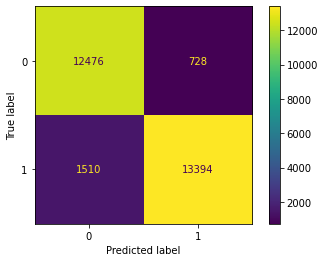

In [33]:
# fit the training dataset on the NB classifier
Naive = naive_bayes.MultinomialNB()
Naive.fit(Train_X_Tfidf,Train_Y)
# predict the labels on validation dataset
predictions_NB = Naive.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, Test_Y)*100)
print("Naive Bayes Precision Score -> ",precision_score(predictions_NB, Test_Y)*100)
print("Naive Bayes Recall Score -> ",recall_score(predictions_NB, Test_Y)*100)
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(predictions_NB, Test_Y)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [34]:
'''# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(Train_X_Tfidf,Train_Y)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Test_Y)*100)
print("SVM Precision Score -> ",precision_score(predictions_SVM, Test_Y)*100)
print("SVM Recall Score -> ",recall_score(predictions_SVM, Test_Y)*100)

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-34-9f8f7a634462>, line 10)